In [171]:
from __future__ import print_function

from time import time
import logging
import os
import yaml
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

In [172]:
config = yaml.safe_load(open(r'.\config.yml'))
rootPath = config['path']

X_train = []
X_test = []
y_train = []
y_test = []

# arr = []
# targets = []

setcnt = 0
h, w = 0, 0
test_size = 0.35
max_data_size = 700

dirs = os.listdir(rootPath)
for singleDir in dirs:
    setcnt = setcnt + 1
    parentPath = os.path.join(rootPath, singleDir)
    files = os.listdir(parentPath)
    if len(files) == 0: break
    
    last_train_index = int(len(files) * (1 - test_size))
    if len(files) > max_data_size:
        last_train_index = int(max_data_size * (1 - test_size))
    
    for i in range(len(files)):
        if i > max_data_size: break
            
        farr = np.array(cv2.resize\
                (cv2.cvtColor(cv2.imread(os.path.join(parentPath, files[i])), cv2.COLOR_BGR2GRAY), (300, 300))) / 255
        h = farr.shape[0]
        w = farr.shape[1]
        farr = farr.reshape(1, farr.shape[1] * farr.shape[0])[0]
        fname = singleDir
        
        # arr.append(farr)
        # targets.append(fname)
        
        if i <= last_train_index:
            X_train.append(farr)
            y_train.append(fname)
        else:
            X_test.append(farr)
            y_test.append(fname)

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

# arr = np.array(arr)
# targets = np.array(targets)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# print("arr:", arr.shape)
# print("targets:", targets.shape)

X_train: (912, 90000)
X_test: (490, 90000)
y_train: (912,)
y_test: (490,)


In [178]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(arr, targets, test_size=0.25, shuffle=False)

### 1. DecisionTreeClassifier

In [175]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10, max_features=4).fit(X_train, y_train)
tree_prediction = tree_clf.predict(X_test)
# tree.plot_tree(tree_clf)

tree_acc_train = tree_clf.score(X_train, y_train)
tree_acc_test = accuracy_score(tree_prediction, y_test)
print('[ DecisionTreeClassifier ] Accuracy: %d%% with train data and %d%% with test data'\
         % (int(tree_acc_train * 100), int(tree_acc_test * 100)))

[ DecisionTreeClassifier ] Accuracy: 93% with train data and 65% with test data


### 2. RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(X_train, y_train)
rf_prediction = rf_clf.predict(X_test)

rf_acc_train = rf_clf.score(X_train, y_train)
rf_acc_test = accuracy_score(rf_prediction, y_test)
print('[ RandomForestClassifier ] Accuracy: %d%% with train data and %d%% with test data'\
         % (int(rf_acc_train * 100), int(rf_acc_test * 100)))

[ RandomForestClassifier ] Accuracy: 100% with train data and 81% with test data


### 3. SupportVectorClassifier (SVC)

In [177]:
from sklearn import svm

svm_clf = svm.SVC().fit(X_train, y_train)
svm_prediction = svm_clf.predict(X_test)

svm_acc_train = svm_clf.score(X_train, y_train)
svm_acc_test = accuracy_score(svm_prediction, y_test)
print('[ SupportVectorClassification ] Accuracy: %d%% with train data and %d%% with test data'\
         % (int(svm_acc_train * 100), int(svm_acc_test * 100)))

[ SupportVectorClassification ] Accuracy: 94% with train data and 81% with test data


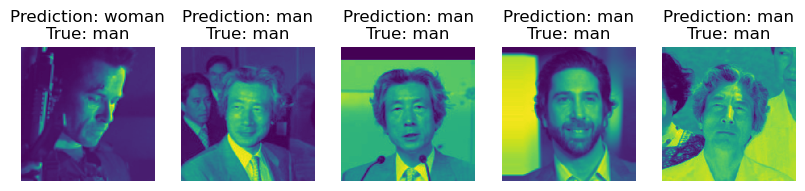

In [179]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for ax, image, ans, prediction in zip(axes, X_test[:5], y_test[:5], svm_prediction):
    ax.set_axis_off()
    image = image.reshape(h, w)
    ax.imshow(image, interpolation="nearest") # cmap=plt.cm.gray_r, 
    ax.set_title(f"Prediction: {prediction}\nTrue: {ans}")

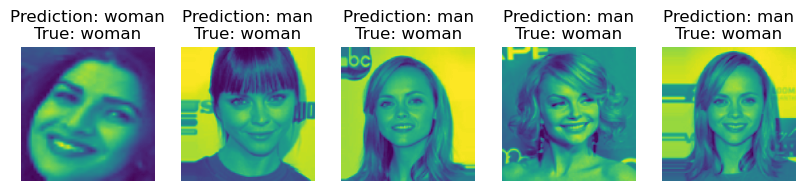

In [180]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5))
for ax, image, ans, prediction in zip(axes, X_test[-5:], y_test[-5:], svm_prediction):
    ax.set_axis_off()
    image = image.reshape(h, w)
    ax.imshow(image, interpolation="nearest") # cmap=plt.cm.gray_r, 
    ax.set_title(f"Prediction: {prediction}\nTrue: {ans}")

In [181]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier(n_neighbors=setcnt, metric='euclidean').fit(X_train, y_train)
kn_prediction = kn_clf.predict(X_test)

kn_acc_train = kn_clf.score(X_train, y_train)
kn_acc_test = accuracy_score(kn_prediction, y_test)
print('[ KNeighborsClassifier ] Accuracy: %d%% with train data and %d%% with test data'\
         % (int(kn_acc_train * 100), int(kn_acc_test * 100)))

[ KNeighborsClassifier ] Accuracy: 90% with train data and 68% with test data


# The Best Classifier Method
### based on the accuracy scores

In [190]:
from sklearn.metrics import accuracy_score

methods = ['DecisionTree', 'RandomForest', 'SupportVector', 'KNeighbors']
acc_arr = np.array([ tree_acc_test, rf_acc_test, svm_acc_test, kn_acc_test ])
# acc_arr = np.array([ round(acc, 2) for acc in acc_arr ])

acc_mth = dict(zip(methods, acc_arr))
acc_max = np.argmax(acc_arr)

for acc in acc_mth:
    print('%s : %.2f' % (acc, (acc_mth[acc] * 100)))

import plotly.graph_objs as go

trace = go.Bar(x=methods, y=acc_arr)
fig = go.Figure(data=trace)
fig.show()

print('The best classifier for this problem is %s (%.2f%%)' % (methods[acc_max], acc_arr[acc_max] * 100))

DecisionTree : 65.51
RandomForest : 81.02
SupportVector : 81.43
KNeighbors : 68.78


The best classifier for this problem is SupportVector (81.43%)
